<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Análisis de Correspondencias Simples</p>   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Diplomado Ciencia de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Curso 2025-1</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

In [ ]:
%%html
<center><marquee style='width: 60%; color: red'><b>✌ ¡Hola a todos y a todas! Un saludo... Bienvenidos a la clase de Análisis de Correspondencias (AC)✌ </b></marquee><center>

# <FONT SIZE=5 COLOR="purple"> 1. Algunos elementos previos </FONT>

El **análisis de correspondencias** es una técnica estadística multivariada que se utiliza principalmente para analizar *tablas de contingencia* (frecuencias cruzadas) entre dos variables categóricas. El objetivo es representar gráficamente la asociación entre las categorías de ambas variables en un espacio de pocas dimensiones (generalmente 2D).

Observe que en la definición aparecen algunos elementos conceptuales que es importante precisar. Esto lo haremos a continuación e iremos ejemplificando.

Recordemos que:



## <FONT SIZE=5 COLOR="blue"> 1.1 Tabla de Contingencia:</FONT>

***Tabla de Contingencia:*** Una tabla de contingencia (también conocida como tabla cruzada o tabla de doble entrada) es una herramienta estadística que resume la relación entre dos variables categóricas. Muestra cómo se distribuyen las observaciones según las combinaciones de categorías de ambas variables.

En ese sentido, podemos tener la tabla ya establecida o la podemos hacer con la instrucción

$$pd.crosstab(datos[``variable1"], datos[``variable1"])$$

Veamos un ejemplo

In [125]:
# librerías de trabajo con dataframes
import pandas as pd
import numpy as np

# librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [126]:
# 1. cargamos los datos
aptos = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/APARTAMENTOS.csv")
aptos.head()


,Unnamed: 0,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
0,1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
1,2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
2,3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
3,4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
4,5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si


In [127]:
# 2. tabla de contingencia de la variable ubicación y estrato
pd.crosstab(aptos["ubicacion"],aptos["estrato"])

estrato,2,3,4,5,6
ubicacion,,,,,
aburra sur,3,73,57,35,1
belen guayabal,1,30,21,15,0
centro,0,16,21,1,0
laureles,0,0,14,56,3
norte,2,5,3,0,0
occidente,2,37,15,15,0
poblado,0,0,7,23,238


## <FONT SIZE=5 COLOR="blue"> 1.2 Valor esperado bajo la hipótesis de independencia </FONT>

Para entender este concepto lo aplicaremos directamente a una matriz de contingencia que representa el consumo de café, té y jugo en tres núcleos poblacionales: jóvenes, adultos y mayores.

In [128]:
# vamos a construir un conjunto de datos
Café = [20,30,10,60]
Té = [10,20,30,60]
Jugo = [20,10,10,40]
Total_fila = [50,60,50,160]
Tabla= pd.DataFrame({"Café":Café,"Té":Té,"Jugo":Jugo,"Total fila":Total_fila},index=["Jóvenes","Adultos","Mayores","Total columna"])
Tabla

,Café,Té,Jugo,Total fila
Jóvenes,20,10,20,50
Adultos,30,20,10,60
Mayores,10,30,10,50
Total columna,60,60,40,160


In [129]:
50/160*60

18.75

Además, si no tenemos en cuenta los totales

In [130]:
# eliminar la ultima fila y la ultima columna de la tabla
datos = Tabla.iloc[0:3,0:3]
datos

,Café,Té,Jugo
Jóvenes,20,10,20
Adultos,30,20,10
Mayores,10,30,10


Vamos a llamar

$$E = \text{Valor esperado bajo la hipotesis de independencia}$$

entre dos variables categóricas. Esto es,

***¿Cuántas observaciones esperaríamos en una celda de la tabla de contingencia si no existiera relación entre las variables?***

**Importante:** Cuando se hace un análisis de correspondencias o una prueba de chi-cuadrado, siempre se está comparando lo que realmente ocurrió (los valores observados) con lo que habría ocurrido por azar si las dos variables no tuvieran ninguna asociación.

**Comparacion**: *Realmente ocurrio* con *Qué habría ocurrido bajo independencia*

Ese "por azar" es justamente lo que se calcula con $E$.

Pero, ¿qué es eso de qué habría ocurrido bajo independencia?

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/5ee222f238d648467c5f760b349cd3c00c37cb1f/AC1.png?raw=true" alt="centered image" width="550" height="350"></center><center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia </FONT> <figcaption></center>


Para calcular este valor debemos recurrir al concepto de independencia entre variables.



**Independencia:** Dos variables son independientes si conocer el valor de una no cambia la probabilidad de observar la otra.

Por ejemplo

Variable 1 : grupo de edades (Jóvenes, Adultos, Mayores)

Variable 2 : bebida preferida (Café, Té, Jugo)

Si tomamos dos categorías y son independientes, por ejemplo

$$P(Te \mid Mayores) = P(Te)$$

La probabilidad de que tomen $Te$ no depende del grupo $Mayores$.

**¿Cómo calculamos ese valor esperado $E$?**

Recordemos que tenemos una tabla de contingencias, luego

- Filas: categorías de una variable

- Columnas: categorías de otra variable

- Celdas: conteos de combinaciones

Entonces, la probabilidad conjunto de dos eventos independientes es

$$P(A \cap B) = P(A) . P(B) = \dfrac{\text{casos favorables A}}{Total}.\dfrac{\text{casos favorables B}}{Total}$$

$$P(A\cap B) = \dfrac{(\text{Total fila categoria A}).(\text{Total fila categoria B})}{Total^2}$$

Este valor da una porcentaje que representa la probabilidad, entonces lo multiplicamos por el total y obtenemos

$$E_{ij} = \dfrac{(\text{Total fila i}).(\text{Total fila j})}{\text{Total General}}$$

Particularmente, en el ejemplo

- $P(Mayores) = \dfrac{50}{160}$

- $P(Te) = \dfrac{60}{160}$

Si suponemos que son independientes, la probabilidad conjunta debería ser:

$$P(Mayores \cap Te) = P(Mayores). P(Te) = \dfrac{50}{160}.\dfrac{60}{160} = 0.1171 $$

Esto me da la probabilidad, pero como queremos saber "cuántos"? es decir, la frecuencia esperada

$$E_{ij} = 0.1171*160 = 18.75$$

Es el número de personas mayores que esperaríamos que elijan té, si no hubiera ninguna relación entre edad y bebida preferida

En otras palabras:

  - Si el grupo de edad no tuviera nada que ver con la elección de bebida (es decir, si fueran independientes),

  - Entonces, por pura proporción matemática, esperaríamos que 18.75 personas mayores eligieran té.

Entonces, observe que lo que ocurre realmente es mayor de lo que que esperabamos

$$30 > 18.75$$

En este caso decimos que hay una asociación positiva: los mayores eligen té más de lo esperado por azar
  

## <FONT SIZE=5 COLOR="blue"> 1.3 Asociación y Mapa de Correspondencias </FONT>

La **asociación** en el análisis de correspondencias se refiere a qué tan relacionadas están las categorías de dos variables categóricas. Es decir, si la ocurrencia de cierta categoría de una variable está más (o menos) relacionada con ciertas categorías de la otra variable, se dice que existe una asociación entre ellas.

**¿Qué significa asociación positiva o negativa?**

Esto se refiere a si una combinación de categorías ocurre más o menos frecuentemente de lo esperado bajo independencia:

 - **Asociación positiva:**

   - La combinación ocurre más de lo esperado.

   - Ejemplo: si esperábamos que 15 jóvenes eligieran jugo pero en realidad 25 lo hicieron → hay asociación positiva entre "Jóvenes" y "Jugo".

   - En el mapa de correspondencias, los puntos están cerca entre sí.

 - **Asociación negativa:**

   - La combinación ocurre menos de lo esperado.

   - Ejemplo: si esperábamos que 15 mayores eligieran café pero solo 5 lo hicieron → hay asociación negativa entre "Mayores" y "Café".

   - En el mapa de correspondencias, los puntos están lejos o en dirección opuesta.

En el mapa de correspondencias (gráfico que genera el AC y que veremos más adelante), se representan las categorías como puntos. La distancia entre puntos refleja el grado de asociación.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/8bbdc881d80b5b106239617592338c475b072d93/AC2.png?raw=true" alt="centered image" width="550" height="350"></center><center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia </FONT> <figcaption></center>



## <FONT SIZE=5 COLOR="blue"> 1.4 Prueba de Chi-Cuadrado para AC </FONT>

La prueba de chi-cuadrado sirve para verificar si existe asociación significativa entre las dos variables categóricas en la tabla de contingencia. En el contexto del Análisis de Correspondencias, es el punto de partida teórico:

El valor total de chi-cuadrado se calcula como:

$$\chi^2 = \sum \limits_{i,j} \dfrac{(O_{ij}-E_{i,j})^2}{E_{ij}}$$

donde,

  - $O_{ij}:$ valor observado (frecuencia real)

  - $E_{ij}:$ valor esperado bajo independencia

  - Los grados de libertad de la chi-cuadrado son

  $$(\text{numero de filas}-1).(\text{numero de columnas}-1)$$

Este valor es proporcional a la inercia total en el análisis de correspondencias, que representa la cantidad de variación (o información) que el modelo está capturando. En variables categóricas no se habla de varianza, sino de inercia.

**Inercia y chi-cuadrado**

En el AC, la inercia total (parecida a la varianza total en PCA) se define como:

$$Inercia\_Total = \dfrac{\chi^2}{n}$$

donde,

 - $\chi^2$, valor de la estadística chi-cuadrado

 - $n$ es el número total de observaciones

**La inercia total es lo que el AC descompone en dimensiones: cada eje (componente) explica parte de esta inercia**

La prueba de chi-cuadrado se aplica antes del análisis si queremos confirmar que existe asociación significativa entre las dos variables. Es una prueba de hipótesis

$$\begin{cases} H_0: \text{las variables son independientes (no hay asociacion)} \\
H_1:  \text{las variables son dependientes ( sí hay asociacion)}    \end{cases}$$

Recordemos, que esto se determina con el $p-valor$.

Si $p-valor < 0.05$ se rechaza la hipótesis nula por que hay evidencia de asociación significativa. Vale la pena aplicar AC.

Si $p-valor ≥ 0.05 $ entonces los datos están cerca de la independencia, luego el AC no revelará patrones fuertes.


Veamos cómo se hace esto usando herramientas de python

In [131]:
# cargamos la librería que me permite hacer la prueba chi-cuadrado
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(datos)

print(f"\nEstadística chi-cuadrado: {chi2:.4f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p:.4f}")
print("\nTabla de frecuencias esperadas bajo independencia:")
print(pd.DataFrame(expected, index=datos.index, columns=datos.columns))


Estadística chi-cuadrado: 24.4444
Grados de libertad: 4
Valor p: 0.0001

Tabla de frecuencias esperadas bajo independencia:
          Café     Té  Jugo
Jóvenes  18.75  18.75  12.5
Adultos  22.50  22.50  15.0
Mayores  18.75  18.75  12.5


Como el valor $p = 0.001 < 0.05$, entonces hay evidencia suficiente para rechazar la hipótesis de independencia, luego hay asociación significativa entre grupo de edad y preferencia de bebida.

# <FONT SIZE=5 COLOR="purple"> 2. Pasos del Análisis de Correspondencias </FONT>

Para hacer el análisis de correspondencias seguiremos los siguientes pasos.

1. Calcular la matriz de frecuencias relativas

2. Calcular los perfiles y marginales (Valor Esperado)

3. Calcular la matriz de desviaciones

4. Descomponer en valores singulares (valores y vectores propios)

5. Calcular las coordenadas factoriales de filas y columnas

## <FONT SIZE=4 COLOR="purple"> 2.1 Calcular la matriz de frecuencias relativas </FONT>

Dividimos cada celda por el total general (160) para convertir los conteos en proporciones:

$$P = \dfrac{n_{ij}}{N}$$

Por ejemplo:

$$jovenes/cafe =  \dfrac{20}{160} = 0.125$$

In [132]:
# hacemos la matriz de proporciones
datos_prop = datos/160
datos_prop

,Café,Té,Jugo
Jóvenes,0.1250,0.0625,0.1250
Adultos,0.1875,0.1250,0.0625
Mayores,0.0625,0.1875,0.0625


## <FONT SIZE=4 COLOR="purple"> 2.2  Perfiles y marginales </FONT>

Tenemos dos perfiles:

 - **Perfiles fila**:  es la suma de cada fila (proporción de la muestra en ese grupo).

 - **Perfiles columna**: es la suma de cada columna (proporción de cada bebida en el total).

 Por ejemplo,

 - $\text{Perfil fila de Jovenes} = 0.1250+0.0625+0.1250 = 0.3125$
 - $\text{Perfil fila de Adultos} = 0.1875+0.1250+0.0625 = 0.375$
 - $\text{Perfil fila de Mayores} = 0.0625+0.1875+0.0625 = 0.3125$

De estos valores sale el marginal en fila

$$\mathbf{r} = [0.3125 \quad  0.375 \quad 0.3125] $$

 - $\text{Perfil fila de Cafe} = 0.1250+0.1875+0.0625 = 0.375$
 - $\text{Perfil fila de Te}   = 0.0625+0.1250+0.0625 = 0.375$
 - $\text{Perfil fila de Jugo} = 0.1250+0.0625+0.0625 = 0.250$

De estos valores sale el marginal en columna

$$\mathbf{c} = [0.375 \quad 0.375 \quad 0.250] $$


In [133]:
r = datos.sum(axis=1) / 160  ; print( r )
c = datos.sum(axis=0) / 160  ; print( c )

Jóvenes    0.3125
Adultos    0.3750
Mayores    0.3125
dtype: float64
Café    0.375
Té      0.375
Jugo    0.250
dtype: float64


## <FONT SIZE=4 COLOR="purple"> 2.3 Matriz de Desviaciones </FONT>

Calculamos la diferencia entre las frecuencias observadas y las esperadas bajo independencia (producto de los marginales):

$$E_{ij} = r_i.c_j$$

$$S_{ij} = \dfrac{P_{ij}-E_{ij}}{\sqrt{(r_i.c_j)}}$$

Esto nos da una matriz de desviaciones estandarizadas, que mide cuán diferente es la proporción observada respecto a lo esperado por azar.

In [134]:
# Paso 1: Tabla de contingencia
datos = pd.DataFrame({
    'Café': [20, 30, 10],
    'Té': [10, 20, 30],
    'Jugo': [20, 10, 10]
}, index=['Jóvenes', 'Adultos', 'Mayores'])

# Total general
N = datos.to_numpy().sum()

# Paso 2: Proporciones observadas (P)
P = datos / N

# Paso 3: Perfiles fila (r) y columna (c)
r = datos.sum(axis=1) / N   # perfil fila
c = datos.sum(axis=0) / N   # perfil columna

# Paso 4: Matriz de frecuencias esperadas bajo independencia
E = pd.DataFrame(np.outer(r, c), index=datos.index, columns=datos.columns)

# Paso 5: Matriz de desviaciones estandarizadas
S = (P - E) / np.sqrt(E)

# Mostrar resultados
print("Proporciones observadas (P):")
print(P.round(4))
print("\nProporciones esperadas (E):")
print(E.round(4))
print("\nMatriz de desviaciones estandarizadas (S):")
print(S.round(4))

Proporciones observadas (P):
           Café      Té    Jugo
Jóvenes  0.1250  0.0625  0.1250
Adultos  0.1875  0.1250  0.0625
Mayores  0.0625  0.1875  0.0625

Proporciones esperadas (E):
           Café      Té    Jugo
Jóvenes  0.1172  0.1172  0.0781
Adultos  0.1406  0.1406  0.0938
Mayores  0.1172  0.1172  0.0781

Matriz de desviaciones estandarizadas (S):
           Café      Té    Jugo
Jóvenes  0.0228 -0.1598  0.1677
Adultos  0.1250 -0.0417 -0.1021
Mayores -0.1598  0.2054 -0.0559


## <FONT SIZE=4 COLOR="purple"> 2.4 Descomposición en valores singulares (SVD) </FONT>

Aplicamos una descomposición en valores singulares (SVD) a la matriz de **desviaciones estandarizadas** para reducir la dimensión del problema.

**Importante:** Esto permite representar las filas y columnas en un espacio de baja dimensión (2D o 3D) donde:

  - Las filas cercanas entre sí tienen perfiles similares.

  - Las columnas cercanas a una fila están asociadas a esa categoría.

  - Esto es lo que permite graficar el mapa de correspondencias.

In [135]:
# Convertir a matriz NumPy
S_matrix = S.to_numpy()

# SVD: S = U * Σ * V^T
U, singular_values, VT = np.linalg.svd(S_matrix, full_matrices=False)

# Mostrar valores singulares
print("Valores singulares (Σ):")
print(singular_values)

# Mostrar valores propios
print("Valores propios:")
print(singular_values**2)

# Coordenadas de las filas (U * Σ)
row_coords = U * singular_values

# Coordenadas de las columnas (V^T * Σ)
col_coords = (VT.T) * singular_values

# Convertir a DataFrame para visualización clara
row_coords_df = pd.DataFrame(row_coords, index=S.index, columns=["Dim 1", "Dim 2", "Dim 3"])
col_coords_df = pd.DataFrame(col_coords, index=S.columns, columns=["Dim 1", "Dim 2", "Dim 3"])

print("\nCoordenadas de filas (U * Σ):")
print(row_coords_df.round(4))

print("\nCoordenadas de columnas (V * Σ):")
print(col_coords_df.round(4))

Valores singulares (Σ):
[0.33 0.2  0.  ]
Valores propios:
[0.11 0.04 0.  ]

Coordenadas de filas (U * Σ):
          Dim 1   Dim 2  Dim 3
Jóvenes -0.2021  0.1155    0.0
Adultos -0.0527 -0.1581    0.0
Mayores  0.2598  0.0577    0.0

Coordenadas de columnas (V * Σ):
       Dim 1   Dim 2  Dim 3
Café -0.1581 -0.1291   -0.0
Té    0.2635  0.0000   -0.0
Jugo -0.1291  0.1581   -0.0


- Los valores singulares (valores propios) Σ: indican cuánta varianza (inercia) explica cada dimensión.

- Las coordenadas de las filas y columnas en el espacio reducido: eso es lo que se grafica en un biplot de correspondencias.

## <FONT SIZE=4 COLOR="purple"> 2.5 Coordenadas de filas y columnas </FONT>

Se calculan las coordenadas factoriales (x, y) de cada fila y columna a partir de los valores singulares y vectores propios obtenidos.

Estos puntos son los que se visualizan en el biplot. La interpretación geométrica es:

  - Cuanto más cerca estén fila y columna, más fuerte es su asociación.

  - Si fila y columna están en direcciones opuestas respecto al centro, tienen relación negativa.

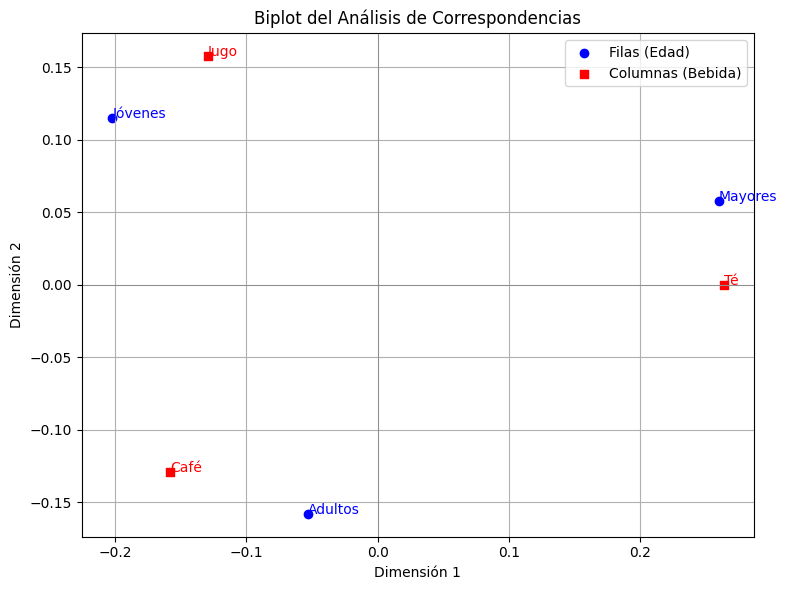

In [136]:
# Crear DataFrames con coordenadas para facilitar etiquetas
row_coords_df = pd.DataFrame(row_coords[:, :2], index=datos.index, columns=["Dim 1", "Dim 2"])
col_coords_df = pd.DataFrame(col_coords[:, :2], index=datos.columns, columns=["Dim 1", "Dim 2"])

# Graficar
fig, ax = plt.subplots(figsize=(8, 6))

# Filas (categorías de edad)
ax.scatter(row_coords_df["Dim 1"], row_coords_df["Dim 2"], color='blue', label='Filas (Edad)')
for i, label in enumerate(row_coords_df.index):
    ax.annotate(label, (row_coords_df.iloc[i, 0], row_coords_df.iloc[i, 1]), color='blue')

# Columnas (categorías de bebida)
ax.scatter(col_coords_df["Dim 1"], col_coords_df["Dim 2"], color='red', marker='s', label='Columnas (Bebida)')
for i, label in enumerate(col_coords_df.index):
    ax.annotate(label, (col_coords_df.iloc[i, 0], col_coords_df.iloc[i, 1]), color='red')

# Ejes
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_title("Biplot del Análisis de Correspondencias")
ax.set_xlabel("Dimensión 1")
ax.set_ylabel("Dimensión 2")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

**Interpretación**

 - Puntos azules: categorías de la variable de filas (grupos de edad).

 - Puntos rojos: categorías de la variable de columnas (bebidas).

La distancia entre puntos refleja similitud o asociación.

  - "Mayores" está cerca de "Té", entonces hay asociación positiva.

  - "Jóvenes" está lejos de "Té", entonces asociación negativa

Finalmente, podemos integrar todo en un solo código

Proporciones observadas (P):
           Café      Té    Jugo
Jóvenes  0.1250  0.0625  0.1250
Adultos  0.1875  0.1250  0.0625
Mayores  0.0625  0.1875  0.0625

Proporciones esperadas (E):
           Café      Té    Jugo
Jóvenes  0.1172  0.1172  0.0781
Adultos  0.1406  0.1406  0.0938
Mayores  0.1172  0.1172  0.0781

Matriz de desviaciones estandarizadas (S):
           Café      Té    Jugo
Jóvenes  0.0228 -0.1598  0.1677
Adultos  0.1250 -0.0417 -0.1021
Mayores -0.1598  0.2054 -0.0559
 
 Valores propios(Σ): [0.11 0.04 0.  ]
Inercia total: 0.153
Aporte de cada valor propio: [0.73 0.27 0.  ]
Aporte acumulado: [0.73 1.   1.  ]

Coordenadas de filas (U * Σ):
          Dim 1   Dim 2  Dim 3
Jóvenes -0.0674  0.0236    0.0
Adultos -0.0176 -0.0323    0.0
Mayores  0.0866  0.0118    0.0

Coordenadas de columnas (V * Σ):
       Dim 1   Dim 2  Dim 3
Café -0.0527 -0.0264   -0.0
Té    0.0878  0.0000   -0.0
Jugo -0.0430  0.0323   -0.0


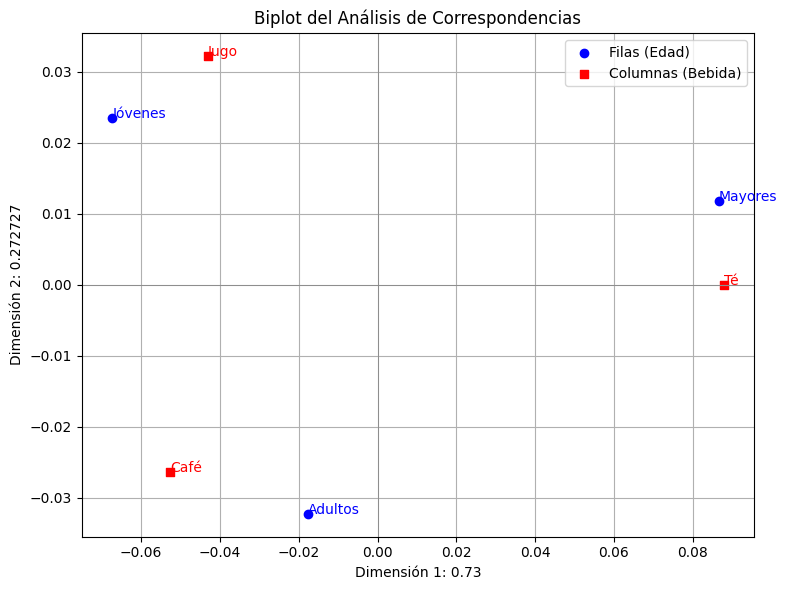

In [137]:
# Paso 1: Tabla de contingencia
datos = pd.DataFrame({
    'Café': [20, 30, 10],
    'Té': [10, 20, 30],
    'Jugo': [20, 10, 10]
}, index=['Jóvenes', 'Adultos', 'Mayores'])

# Total general
N = datos.to_numpy().sum()

# Paso 2: Proporciones observadas (P)
P = datos / N

# Paso 3: Perfiles fila (r) y columna (c)
r = datos.sum(axis=1) / N   # perfil fila
c = datos.sum(axis=0) / N   # perfil columna

# Paso 4: Matriz de frecuencias esperadas bajo independencia
E = pd.DataFrame(np.outer(r, c), index=datos.index, columns=datos.columns)

# Paso 5: Matriz de desviaciones estandarizadas
S = (P - E) / np.sqrt(E)

# Mostrar resultados
print("Proporciones observadas (P):")
print(P.round(4))
print("\nProporciones esperadas (E):")
print(E.round(4))
print("\nMatriz de desviaciones estandarizadas (S):")
print(S.round(4))

# Convertir a matriz NumPy
S_matrix = S.to_numpy()

# SVD: S = U * Σ * V^T
U, singular_values, VT = np.linalg.svd(S_matrix, full_matrices=False)

singular_values =singular_values**2

# Mostrar valores singulares
print(f" \n Valores propios(Σ): {singular_values}")

inercia = singular_values.sum()
print(f"Inercia total: {inercia:.3f}")

aporte = singular_values/inercia
print(f"Aporte de cada valor propio: {aporte}")

aporte_acumulado = np.cumsum(aporte)
print(f"Aporte acumulado: {aporte_acumulado}")

# Coordenadas de las filas (U * Σ)
row_coords = U * singular_values

# Coordenadas de las columnas (V^T * Σ)
col_coords = (VT.T) * singular_values

# Convertir a DataFrame para visualización clara
row_coords_df = pd.DataFrame(row_coords, index=S.index, columns=["Dim 1", "Dim 2", "Dim 3"])
col_coords_df = pd.DataFrame(col_coords, index=S.columns, columns=["Dim 1", "Dim 2", "Dim 3"])

print("\nCoordenadas de filas (U * Σ):")
print(row_coords_df.round(4))

print("\nCoordenadas de columnas (V * Σ):")
print(col_coords_df.round(4))

# Crear DataFrames con coordenadas para facilitar etiquetas
row_coords_df = pd.DataFrame(row_coords[:, :2], index=datos.index, columns=["Dim 1", "Dim 2"])
col_coords_df = pd.DataFrame(col_coords[:, :2], index=datos.columns, columns=["Dim 1", "Dim 2"])

# Graficar
fig, ax = plt.subplots(figsize=(8, 6))

# Filas (categorías de edad)
ax.scatter(row_coords_df["Dim 1"], row_coords_df["Dim 2"], color='blue', label='Filas (Edad)')
for i, label in enumerate(row_coords_df.index):
    ax.annotate(label, (row_coords_df.iloc[i, 0], row_coords_df.iloc[i, 1]), color='blue')

# Columnas (categorías de bebida)
ax.scatter(col_coords_df["Dim 1"], col_coords_df["Dim 2"], color='red', marker='s', label='Columnas (Bebida)')
for i, label in enumerate(col_coords_df.index):
    ax.annotate(label, (col_coords_df.iloc[i, 0], col_coords_df.iloc[i, 1]), color='red')

# Ejes
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_title("Biplot del Análisis de Correspondencias")
ax.set_xlabel(f"Dimensión 1: {aporte[0]:.2f}")
ax.set_ylabel(f"Dimensión 2: {aporte[1]:2f}")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Ahora, usaremos una librería denominada **prince**

In [139]:
%%capture
!pip install git+https://github.com/MaxHalford/Prince

📈 Valores propios:
Dim 1: 0.1111
Dim 2: 0.0417

⚙️ Inercia total: 0.1528

📊 Proporción de la inercia explicada:
Dim 1: 72.73%
Dim 2: 27.27%


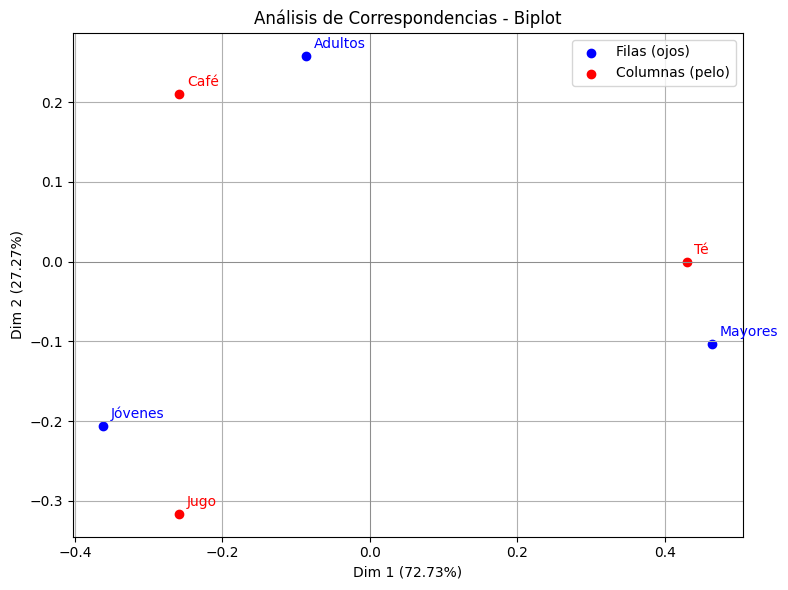

In [140]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame
df = datos

# 2. Análisis de correspondencias
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(df)

# 3. Obtener valores propios (eigenvalues)
eigenvalues = ca.eigenvalues_
total_inertia = sum(eigenvalues)

# 4. Calcular proporción de inercia explicada manualmente
explained_inertia = [eig / total_inertia for eig in eigenvalues]

# 5. Imprimir análisis
print("📈 Valores propios:")
for i, val in enumerate(eigenvalues):
    print(f"Dim {i+1}: {val:.4f}")

print("\n⚙️ Inercia total:", round(total_inertia, 4))

print("\n📊 Proporción de la inercia explicada:")
for i, val in enumerate(explained_inertia):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 6. Coordenadas
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# 7. Biplot con etiquetas mejoradas
fig, ax = plt.subplots(figsize=(8, 6))

# Filas
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Filas (ojos)')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (row_coords.iloc[i, 0]+0.01, row_coords.iloc[i, 1]+0.01), color='blue')

# Columnas
ax.scatter(col_coords[0], col_coords[1], color='red', label='Columnas (pelo)')
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (col_coords.iloc[i, 0]+0.01, col_coords.iloc[i, 1]+0.01), color='red')

# Ejes con % de inercia explicada
dim1 = explained_inertia[0] * 100
dim2 = explained_inertia[1] * 100
ax.set_xlabel(f'Dim 1 ({dim1:.2f}%)')
ax.set_ylabel(f'Dim 2 ({dim2:.2f}%)')

# Estética
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_title('Análisis de Correspondencias - Biplot')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# <FONT SIZE=5 COLOR="purple"> 3. Ejemplo 2 </FONT>

Consideremos la siguiente tabla de contingencias:

In [142]:
## Código para el ejemplo 1.
arreglo = np.array([688,116,584,188,4,326,38,241,110,3, 343,84,909,412,26,98,48,403,681,85,]).reshape(4,5)
columns = ["Rubio(ru)", "Rojo(r)", "Medio(m)","Oscuro(o)", "Negro(n)"]
index = ["Claros(C)","Azules(A)", "Medio(M)","Oscuros(O)"]
example_df = pd.DataFrame(arreglo, columns = columns, index = index)
example_df

,Rubio(ru),Rojo(r),Medio(m),Oscuro(o),Negro(n)
Claros(C),688,116,584,188,4
Azules(A),326,38,241,110,3
Medio(M),343,84,909,412,26
Oscuros(O),98,48,403,681,85


📈 Valores propios:
Dim 1: 0.1992
Dim 2: 0.0301

⚙️ Inercia total: 0.2293

📊 Proporción de la inercia explicada:
Dim 1: 86.88%
Dim 2: 13.12%


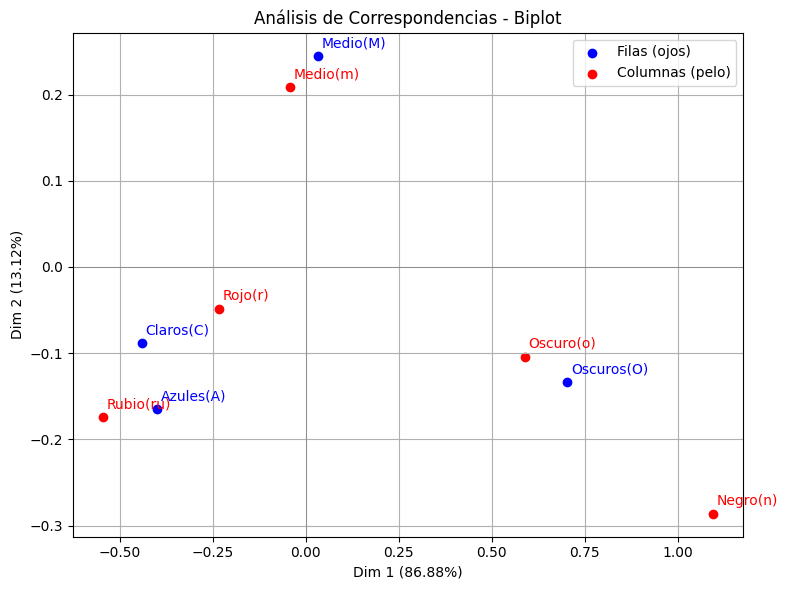

In [143]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame
df = example_df

# 2. Análisis de correspondencias
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(df)

# 3. Obtener valores propios (eigenvalues)
eigenvalues = ca.eigenvalues_
total_inertia = sum(eigenvalues)

# 4. Calcular proporción de inercia explicada manualmente
explained_inertia = [eig / total_inertia for eig in eigenvalues]

# 5. Imprimir análisis
print("📈 Valores propios:")
for i, val in enumerate(eigenvalues):
    print(f"Dim {i+1}: {val:.4f}")

print("\n⚙️ Inercia total:", round(total_inertia, 4))

print("\n📊 Proporción de la inercia explicada:")
for i, val in enumerate(explained_inertia):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 6. Coordenadas
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# 7. Biplot con etiquetas mejoradas
fig, ax = plt.subplots(figsize=(8, 6))

# Filas
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Filas (ojos)')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (row_coords.iloc[i, 0]+0.01, row_coords.iloc[i, 1]+0.01), color='blue')

# Columnas
ax.scatter(col_coords[0], col_coords[1], color='red', label='Columnas (pelo)')
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (col_coords.iloc[i, 0]+0.01, col_coords.iloc[i, 1]+0.01), color='red')

# Ejes con % de inercia explicada
dim1 = explained_inertia[0] * 100
dim2 = explained_inertia[1] * 100
ax.set_xlabel(f'Dim 1 ({dim1:.2f}%)')
ax.set_ylabel(f'Dim 2 ({dim2:.2f}%)')

# Estética
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_title('Análisis de Correspondencias - Biplot')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# <FONT SIZE=5 COLOR="purple"> 4. Ejemplo 3 : Apartamentos </FONT>

Consideremos el conjunto de datos apartamentos

📈 Valores propios:
Dim 1: 0.8278
Dim 2: 0.2340

⚙️ Inercia total: 1.0618

📊 Proporción de la inercia explicada:
Dim 1: 77.97%
Dim 2: 22.03%


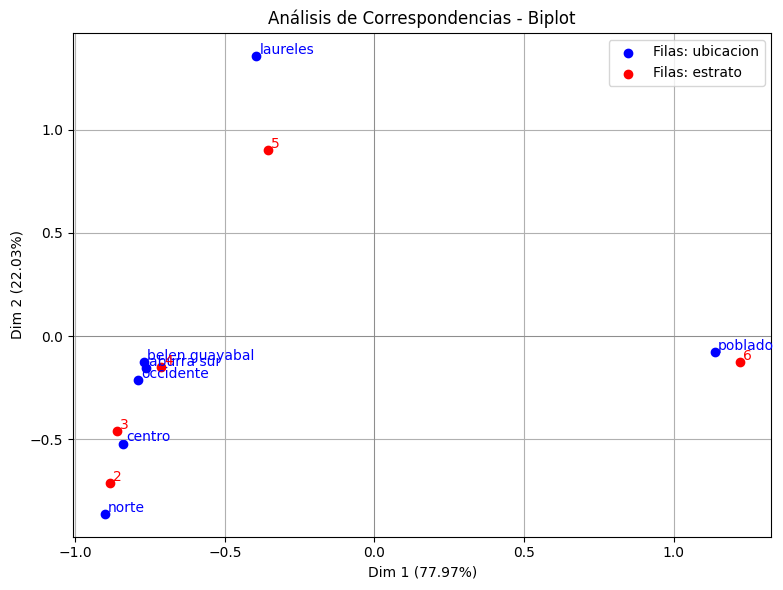

In [145]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame
dataframe = aptos
variable1 = "ubicacion"
variable2 = "estrato"

df = pd.crosstab(dataframe[variable1], dataframe[variable2])

# 2. Análisis de correspondencias
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(df)

# 3. Obtener valores propios (eigenvalues)
eigenvalues = ca.eigenvalues_
total_inertia = sum(eigenvalues)

# 4. Calcular proporción de inercia explicada manualmente
explained_inertia = [eig / total_inertia for eig in eigenvalues]

# 5. Imprimir análisis
print("📈 Valores propios:")
for i, val in enumerate(eigenvalues):
    print(f"Dim {i+1}: {val:.4f}")

print("\n⚙️ Inercia total:", round(total_inertia, 4))

print("\n📊 Proporción de la inercia explicada:")
for i, val in enumerate(explained_inertia):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 6. Coordenadas
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# 7. Biplot con etiquetas mejoradas
fig, ax = plt.subplots(figsize=(8, 6))

# Filas
ax.scatter(row_coords[0], row_coords[1], color='blue', label=f'Filas: {variable1}')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (row_coords.iloc[i, 0]+0.01, row_coords.iloc[i, 1]+0.01), color='blue')

# Columnas
ax.scatter(col_coords[0], col_coords[1], color='red', label=f'Filas: {variable2}')
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (col_coords.iloc[i, 0]+0.01, col_coords.iloc[i, 1]+0.01), color='red')

# Ejes con % de inercia explicada
dim1 = explained_inertia[0] * 100
dim2 = explained_inertia[1] * 100
ax.set_xlabel(f'Dim 1 ({dim1:.2f}%)')
ax.set_ylabel(f'Dim 2 ({dim2:.2f}%)')

# Estética
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_title('Análisis de Correspondencias - Biplot')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Un adicional ACM

 - ACM se usa para encuestas de opinión, estudios de mercado, y cualquier análisis con múltiples preguntas categóricas.

 - Se puede hacer análisis de segmentos, clústeres de respuestas, y más.

 - NO relaciona categoría por categoría, sino la relación global de individuos y modalidades

Supongamos una pequeña encuesta con 6 personas sobre:

🍽️ Comida favorita: Pizza, Sushi, Ensalada

🎨 Color favorito: Rojo, Azul, Verde

🎮 Actividad favorita: Leer, Jugar videojuegos, Deportes


📈 Valores propios (eigenvalues): [0.76 0.61]

% de inercia explicada por dimensión:
Dim 1: 55.41%
Dim 2: 44.59%


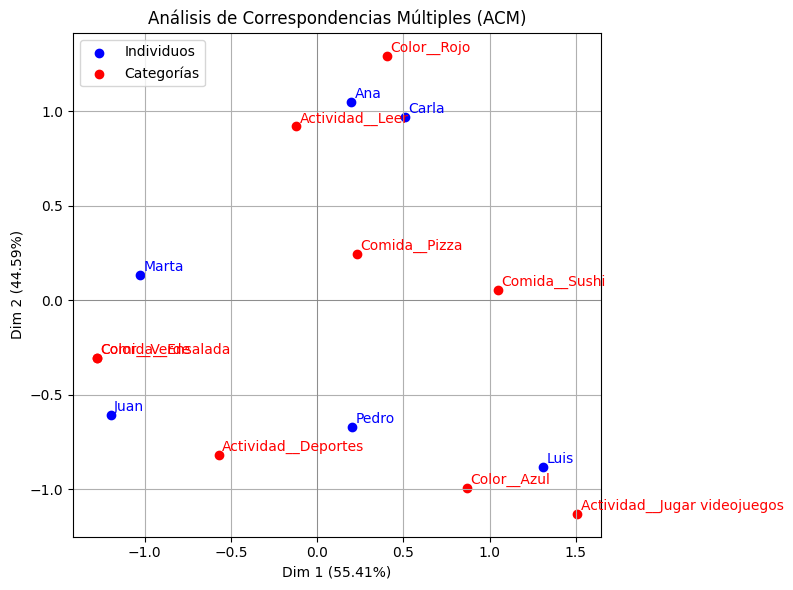

In [146]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame de ejemplo
df = pd.DataFrame({
    'Persona': ['Ana', 'Luis', 'Marta', 'Pedro', 'Carla', 'Juan'],
    'Comida': ['Pizza', 'Sushi', 'Ensalada', 'Pizza', 'Sushi', 'Ensalada'],
    'Color': ['Rojo', 'Azul', 'Verde', 'Azul', 'Rojo', 'Verde'],
    'Actividad': ['Leer', 'Jugar videojuegos', 'Leer', 'Deportes', 'Leer', 'Deportes']
}).set_index('Persona')

# 2. Aplicar ACM
mca = prince.MCA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
mca = mca.fit(df)

# 3. Inercia explicada
eigvals = mca.eigenvalues_
total_inertia = sum(eigvals)
explained = [v / total_inertia for v in eigvals]

print("📈 Valores propios (eigenvalues):", eigvals)
print("\n% de inercia explicada por dimensión:")
for i, val in enumerate(explained):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 4. Coordenadas
row_coords = mca.row_coordinates(df)      # Individuos
col_coords = mca.column_coordinates(df)   # Categorías

# 5. Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Individuos
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Individuos')
for i, name in enumerate(df.index):
    ax.annotate(name, (row_coords.iloc[i, 0] + 0.02, row_coords.iloc[i, 1] + 0.02), color='blue')

# Modalidades
ax.scatter(col_coords[0], col_coords[1], color='red', label='Categorías')
for i, name in enumerate(col_coords.index):
    ax.annotate(name, (col_coords.iloc[i, 0] + 0.02, col_coords.iloc[i, 1] + 0.02), color='red')

ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_xlabel(f"Dim 1 ({explained[0]*100:.2f}%)")
ax.set_ylabel(f"Dim 2 ({explained[1]*100:.2f}%)")
ax.set_title("Análisis de Correspondencias Múltiples (ACM)")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretación del ACM**

  - Individuos cercanos están más relacionados en sus respuestas.

  - Modalidades cercanas tienden a aparecer juntas en las mismas personas.

  - Si una persona está cerca de una categoría, significa que esa fue su respuesta.

  - Las dimensiones explican qué tanto del "patrón de asociación" está siendo capturado en el plano.